# Sheet 3

## Excersise 2a
Use tabulation to compute the total as well as relative frequency of values per coun- try. Interpret your findings.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df_billionaires = pd.read_csv('./Data/billionaires_statistics_dataset.csv')

df_billionaires

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,Healthcare,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2636,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,Food & Beverage,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2637,2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2638,2540,1000,Real Estate,Zhang Guiping & family,71.0,China,Nanjing,Real estate,Real Estate,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397


In [3]:
total_net_worth = df_billionaires['finalWorth'].sum() * 1000000
print("Total Net Worth: $",f"{total_net_worth:,.0f}")

Total Net Worth: $ 12,206,800,000,000


In [4]:
country_counts = df_billionaires['country'].value_counts()
relative_frequency = df_billionaires['country'].value_counts(normalize=True) * 100 

# Combine total and relative frequency in a DataFrame
country_frequency_df = pd.DataFrame({
    'Total Count': country_counts,
    'Relative Frequency (%)': relative_frequency
})

# Display the DataFrame
print(country_frequency_df)

#export to csv
country_frequency_df.to_csv('./Output/country_frequency.csv')

                Total Count  Relative Frequency (%)
country                                            
United States           754               28.977709
China                   523               20.099923
India                   157                6.033820
Germany                 102                3.920061
United Kingdom           82                3.151422
...                     ...                     ...
Guernsey                  1                0.038432
Tanzania                  1                0.038432
Bahrain                   1                0.038432
Andorra                   1                0.038432
Armenia                   1                0.038432

[78 rows x 2 columns]


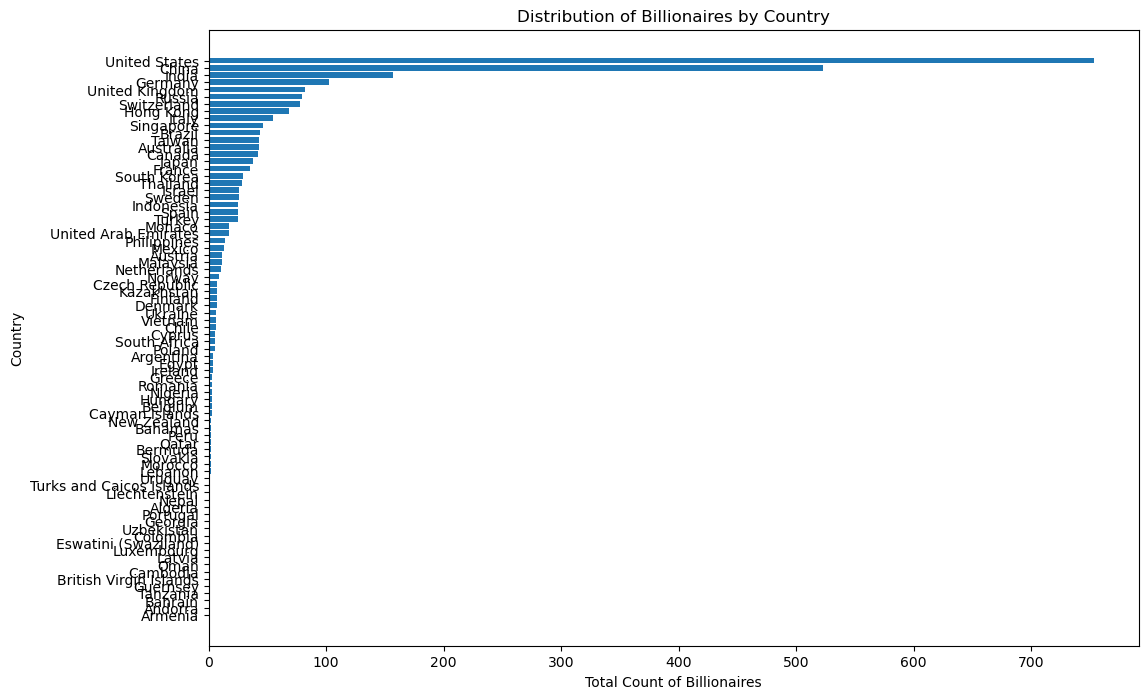

In [5]:
country_frequency_df.index.name = 'Country'  

plt.figure(figsize=(12, 8))
plt.barh(country_frequency_df.index, country_frequency_df['Total Count'])
plt.xlabel('Total Count of Billionaires')
plt.ylabel('Country')
plt.title('Distribution of Billionaires by Country')
plt.gca().invert_yaxis()  
plt.show()

Findings:
- First 2 Countrys have nearly half of all billionaires
- Germany is on fourth place although the country has in comparison few citizens
- The distribution flattens out strongly

## Excersise 2b
For the following few tasks, we will focus on the variable finalWorth, that indicates the final net worth of each billionaire in U.S. dollars:
- Use measures of location to show the central tendency of the final worth via calculating the 1) mean, (2) 20% trimmed mean, (3) median, and (4) mode.
Please interpret your results and indicate the differences between these calculations. Visualize the distribution of the final worth using (1) a histogram, (2) a density plot, and (3) a boxplot combined with a density plot.
- Identify the spread of the final worth by using the variance, standard deviation and interquartile range.
- Identify and explain if the data values of the final worth are skewed. Is the final worth heavy-tailed or light tailed relative to a normal distribution? Use graphical and non- graphical methods (e.g. calculations) to underline your argumentation.

Measures:
Mean: 4.62 billion
20% Trimmed Mean: 2.9 billion
Median: 2.3 billion
Mode: 1.2 billion


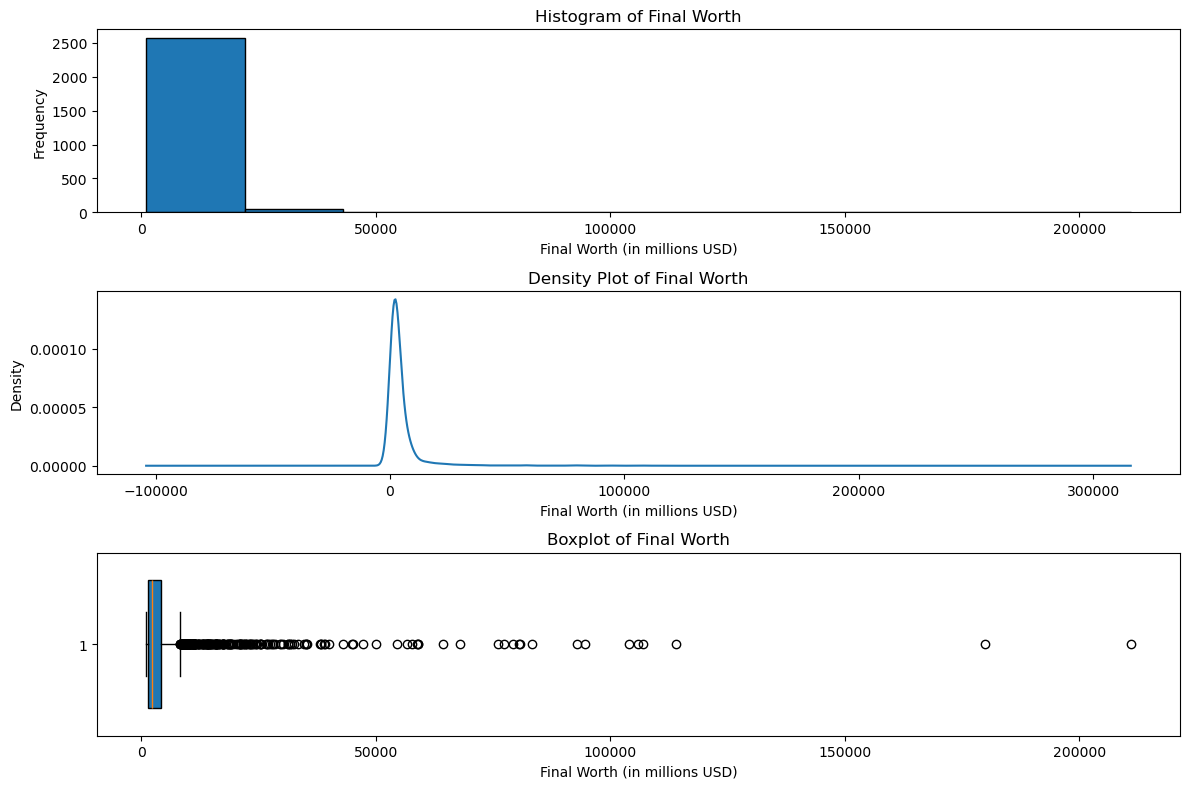

In [6]:
trim_count = int(len(df_billionaires['finalWorth']) * 0.1)

# Calculating measures of central tendency
mean_final_worth = (df_billionaires['finalWorth'].mean() / 1000).round(2)
# Remove 10% each of the lowest and highest values to get 20% trimmed mean
trimmed_mean_final_worth = (df_billionaires['finalWorth'].sort_values().iloc[trim_count:-trim_count].mean() / 1000).round(2)
# Sort all values and get the middle value
median_final_worth = (df_billionaires['finalWorth'].median() / 1000)
# Look at the value which occurs most frequently
mode_final_worth = (df_billionaires['finalWorth'].mode().iloc[0] / 1000).round(2)

# Display results
print("Measures:")
print("Mean:", mean_final_worth, "billion")
print("20% Trimmed Mean:", trimmed_mean_final_worth, "billion")
print("Median:", median_final_worth, "billion")
print("Mode:", mode_final_worth, "billion")

# Visualizations
plt.figure(figsize=(12, 8))

# Histogram
plt.subplot(3, 1, 1)
plt.hist(df_billionaires['finalWorth'], bins=10, edgecolor='black')
plt.title("Histogram of Final Worth")
plt.xlabel("Final Worth (in millions USD)")
plt.ylabel("Frequency")

# Density Plot
plt.subplot(3, 1, 2)
df_billionaires['finalWorth'].plot(kind='kde')
plt.title("Density Plot of Final Worth")
plt.xlabel("Final Worth (in millions USD)")

# Boxplot
plt.subplot(3, 1, 3)
plt.boxplot(df_billionaires['finalWorth'], vert=False, widths=0.7, patch_artist=True)
plt.title("Boxplot of Final Worth")
plt.xlabel("Final Worth (in millions USD)")

plt.tight_layout()
plt.show()


Interpretation of Results:
- **Mean (4.62 billion)**:
  - Higher average, heavily influenced by extreme values.

- **20% Trimmed Mean (2.9 billion)**:
  - As the value is lower than the mean, extremely high values are impacting this value

- **Median (2.3 billion)**:
  - Very low median in comparison to the highest values

- **Mode (1.2 billion)**:
  - Most frequent value in the dataset is 1.2 Billion which indicates to be right skewed

**Identify the spread of the final worth by using the variance, standard deviation and interquartile range.**

In [7]:
# Squared deviation from the mean 
variance_final_worth = (df_billionaires['finalWorth'].var() / 1000**2)

# Root of the variance, which shows the average distance of data points from the mean
std_dev_final_worth = (df_billionaires['finalWorth'].std() / 1000)

# Range of which the middle 50% of the data falls
iqr_final_worth = ((df_billionaires['finalWorth'].quantile(0.75) - df_billionaires['finalWorth'].quantile(0.25)) / 1000).round(2)

# Display the results
print("Variance (in billions squared):", variance_final_worth)
print("Standard Deviation (in billions):", std_dev_final_worth)
print("Interquartile Range (IQR, in billions):", iqr_final_worth)

Variance (in billions squared): 96.71229485457094
Standard Deviation (in billions): 9.834240939420335
Interquartile Range (IQR, in billions): 2.7


**Identify and explain if the data values of the final worth are skewed. Is the final worth heavy-tailed or light tailed relative to a normal distribution? Use graphical and non- graphical methods (e.g. calculations) to underline your argumentation.**

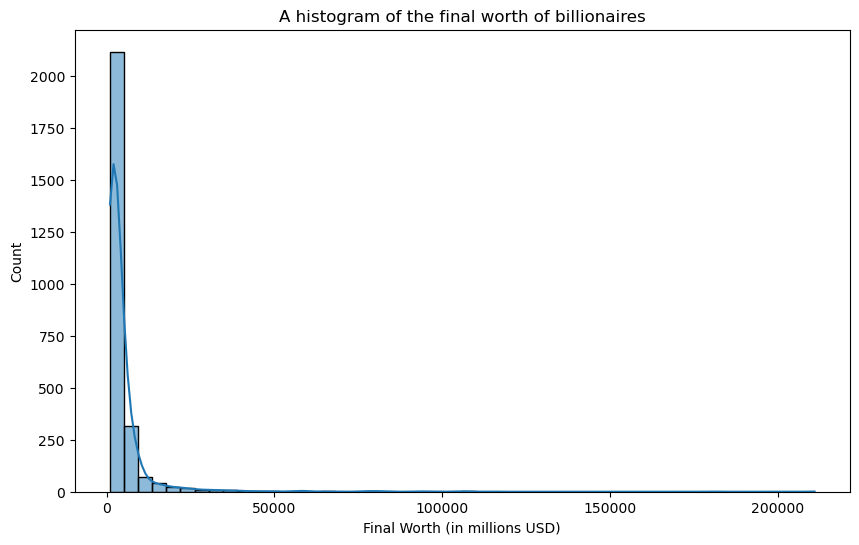

Skewness: 10.012367321086751
Kurtosis: 145.07368067526582


In [8]:
# Skewness impressses how asymmetrical the data is
skewness_final_worth = df_billionaires['finalWorth'].skew()

# Kurtosis indicates if the data is heavy-tailed or light-tailed relative to a normal distribution
kurtosis_final_worth = df_billionaires['finalWorth'].kurtosis()

plt.figure(figsize=(10, 6))
sns.histplot(df_billionaires['finalWorth'], bins=50, kde=True, edgecolor="black")

plt.xlabel("Final Worth (in millions USD)")
plt.title("A histogram of the final worth of billionaires")
plt.show()

plt.show()

print("Skewness:", skewness_final_worth)
print("Kurtosis:", kurtosis_final_worth)


Interpretation:
- The Values is right skewed, which means that there are some extreme high values
- The Distribution is heavily tailed with the value of 145 in comparison to a normal distribution of 3

## Excersise 2c

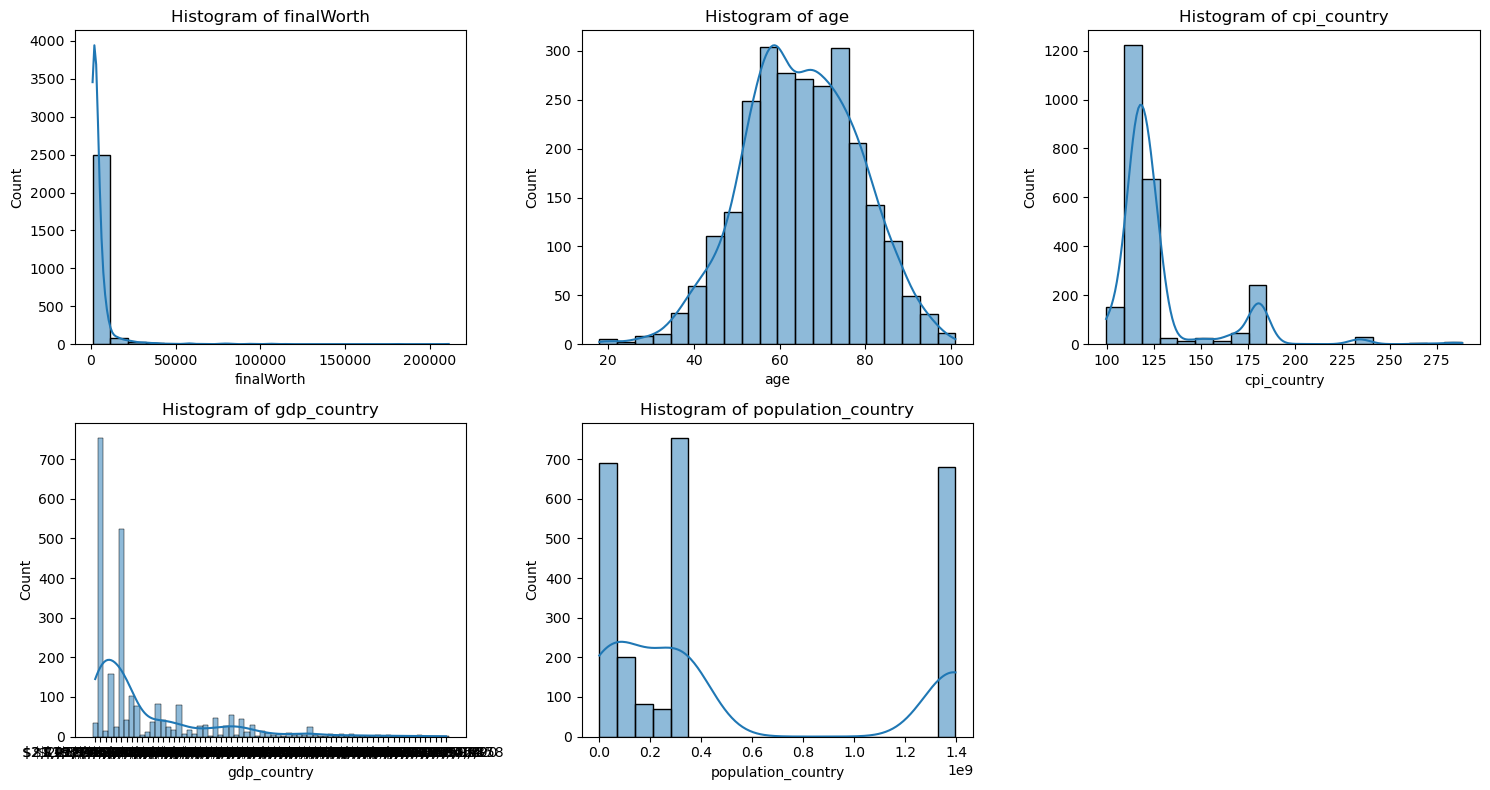

In [9]:
continuous_variables = ["finalWorth", "age", "cpi_country", "gdp_country", "population_country"]

# Plot histograms for each variable
plt.figure(figsize=(15, 8))
for i, var in enumerate(continuous_variables, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_billionaires[var], bins=20, kde=True)
    plt.title(f"Histogram of {var}")
plt.tight_layout()
plt.show()

In [10]:
for var in continuous_variables:
    df_billionaires[var] = df_billionaires[var].astype(str)
    df_billionaires[var] = pd.to_numeric(df_billionaires[var].replace({'\$': '', ',': ''}, regex=True).str.strip(), errors='coerce')
    skewness = df_billionaires[var].skew()
    kurtosis_value = df_billionaires[var].kurtosis()
    print(f"{var}: Skewness = {skewness:.2f}, Kurtosis = {kurtosis_value:.2f}")

finalWorth: Skewness = 10.01, Kurtosis = 145.07
age: Skewness = -0.08, Kurtosis = -0.18
cpi_country: Skewness = 2.58, Kurtosis = 7.92
gdp_country: Skewness = -0.08, Kurtosis = -1.95
population_country: Skewness = 0.87, Kurtosis = -1.06


Results: 
- The Age is nearly normally distributed

The findings implies:
- For Age, a normal distribution means most billionaires are around a common age, with fewer very young or very old individuals.

Why is it useful to know if values are normally distributed?
- Outliers are easier to spot in normally distributed data.
- Normally distributed values allow for more reliable predictions.